# Machine Learning Example

###### ML is process of finding a mapping function by analysing the provided data with the help of ML algorithm and making final prediction baesd on that found mapping function.

## ML Steps
1. Data construction
2. Data Pre-processing (
    i. analysis
    ii. feature correlation
    iii. feature selection
    iv. feature scaling)
3. Hyper-parameter Optimization
4. Model tuning
5. Model evaluation

### Lets begin
## Importing libraries

In [396]:
#Load necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

## Loading data

In [282]:
xl_file = 'half_heusler_data.xlsx'
csv_file = 'half_heusler_data.csv'
data = pd.read_excel(xl)
data.to_csv(csv_file,index=False)
print(f"Excel file is sucessfully converted, Saved as {csv_file}")

Excel file is sucessfully converted, Saved as half_heusler_data.csv


In [283]:
#uploading converted csv_file
data = pd.read_csv(csv_file)
data

,Compound(xyz),r x(Å),ry(Å),rz(Å),a(Å),ez
0,CoMnP,0.90,0.96,0.80,5.34,2.19
1,CoFeP,0.90,0.78,0.80,5.35,2.19
2,CoMnSi,0.90,0.96,0.85,5.36,1.90
3,CoVP,0.90,0.72,0.80,5.36,2.19
4,CoCrSi,0.90,0.57,0.85,5.36,1.90
...,...,...,...,...,...,...
132,FeMnSi,0.78,0.96,0.85,5.32,1.90
133,FeVP,0.78,0.72,0.80,5.31,2.19
134,FeFeP,0.78,0.78,0.80,5.31,2.19
135,MnCrP,0.96,0.57,0.80,5.30,2.19


## Data Preprocessing
  
      Analysing and handling missing data
      Data visualization, removing outliers
      Encoding catagorical values
      Feature scaling
      Feature engineering
 

In [284]:
#data range
data.index

RangeIndex(start=0, stop=137, step=1)

In [285]:
#to know about data types
data.info()
#data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Compound(xyz)  137 non-null    object 
 1   r x(Å)         137 non-null    float64
 2   ry(Å)          137 non-null    float64
 3   rz(Å)          137 non-null    float64
 4   a(Å)           137 non-null    float64
 5   ez             137 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.6+ KB


In [286]:
data.isnull().sum(axis=0)

Compound(xyz)    0
r x(Å)           0
ry(Å)            0
rz(Å)            0
a(Å)             0
ez               0
dtype: int64

In [287]:
#knowing the vaccant row or column in data
#data.isnull().sum()
data.isnull().sum(axis=0) #along rows for each column
#data.isnull().sum(axis=1)#along columns for each row

Compound(xyz)    0
r x(Å)           0
ry(Å)            0
rz(Å)            0
a(Å)             0
ez               0
dtype: int64

In [288]:
#Finding along columns
null_columns = data.columns[data.isnull().any()]
print(null_columns)

Index([], dtype='object')


In [289]:
#Printing rows of that particular column
null_values = data[data['a(Å)'].isnull()]
null_index = null_values.index
#print(null_values)
print(null_index)

Int64Index([], dtype='int64')


In [290]:
#finding along rows
null_rows = data[data.isnull().any(axis=1)]
print(null_rows)

Empty DataFrame
Columns: [Compound(xyz), r x(Å), ry(Å), rz(Å), a(Å), ez]
Index: []


In [291]:
data.duplicated().any()

True

In [292]:
duplicate = data[data.duplicated()]
print(duplicate)

   Compound(xyz)  r x(Å)  ry(Å)  rz(Å)  a(Å)    ez
12         CrMnP    0.57   0.96    0.8  5.42  2.19


In [421]:
#finding non duplicate data
data.nunique()

Compound(xyz)    136
r x(Å)             7
ry(Å)              6
rz(Å)              6
a(Å)              71
ez                 9
dtype: int64

In [422]:
data.columns

Index(['Compound(xyz)', 'r x(Å)', 'ry(Å)', 'rz(Å)', 'a(Å)', 'ez'], dtype='object')

In [423]:
data[['Compound(xyz)','a(Å)']]

,Compound(xyz),a(Å)
0,CoMnP,5.34
1,CoFeP,5.35
2,CoMnSi,5.36
3,CoVP,5.36
4,CoCrSi,5.36
...,...,...
132,FeMnSi,5.32
133,FeVP,5.31
134,FeFeP,5.31
135,MnCrP,5.30


In [425]:
#knowing tha value at apticular position
data['a(Å)'].loc[136]

5.29

In [426]:
#printing rows
data.loc[136]

Compound(xyz)    FeCrP
r x(Å)            0.78
ry(Å)             0.57
rz(Å)              0.8
a(Å)              5.29
ez                2.19
Name: 136, dtype: object

In [427]:
#matching the values
data[data['ez']==2.19]

,Compound(xyz),r x(Å),ry(Å),rz(Å),a(Å),ez
0,CoMnP,0.90,0.96,0.8,5.34,2.19
1,CoFeP,0.90,0.78,0.8,5.35,2.19
3,CoVP,0.90,0.72,0.8,5.36,2.19
7,MnVP,0.96,0.72,0.8,5.40,2.19
10,CrMnP,0.57,0.96,0.8,5.42,2.19
11,NiCrP,0.70,0.57,0.8,5.42,2.19
12,CrMnP,0.57,0.96,0.8,5.42,2.19
13,CoTiP,0.90,0.74,0.8,5.43,2.19
20,FeTiP,0.78,0.74,0.8,5.45,2.19
21,NiVP,0.70,0.72,0.8,5.45,2.19


In [428]:
data[data['ez']<2.19]

,Compound(xyz),r x(Å),ry(Å),rz(Å),a(Å),ez
2,CoMnSi,0.90,0.96,0.85,5.36,1.90
4,CoCrSi,0.90,0.57,0.85,5.36,1.90
5,CoFeSi,0.90,0.78,0.85,5.36,1.90
6,MnMnSi,0.96,0.96,0.85,5.37,1.90
8,CoVSi,0.90,0.72,0.85,5.41,1.90
...,...,...,...,...,...,...
124,NiVAs,0.70,0.72,0.79,5.62,2.18
125,CoTiAs,0.90,0.74,0.79,5.61,2.18
127,NiTiSi,0.70,0.74,0.85,5.56,1.90
128,FeCrSi,0.78,0.57,0.85,5.33,1.90


In [429]:
#printing columns that corresponds to maximum value of another column
data[['a(Å)','ez']][data.ez==data['ez'].max()]

,a(Å),ez
0,5.34,2.19
1,5.35,2.19
3,5.36,2.19
7,5.40,2.19
10,5.42,2.19
11,5.42,2.19
12,5.42,2.19
13,5.43,2.19
20,5.45,2.19
21,5.45,2.19


In [430]:
#printinng statistical parameter
data.ez.mean()

2.0264233576642336

In [431]:
data.ez.max()

2.19

In [432]:
data.describe()

,r x(Å),ry(Å),rz(Å),a(Å),ez
count,137.000000,137.000000,137.000000,137.000000,137.000000
mean,0.811387,0.751752,0.811314,5.656204,2.026423
std,0.116102,0.135136,0.031804,0.231600,0.164999
min,0.570000,0.570000,0.790000,5.290000,1.610000
25%,0.700000,0.690000,0.790000,5.480000,1.900000
50%,0.790000,0.740000,0.800000,5.620000,2.050000
75%,0.900000,0.780000,0.810000,5.810000,2.180000
max,0.960000,0.960000,0.920000,6.430000,2.190000


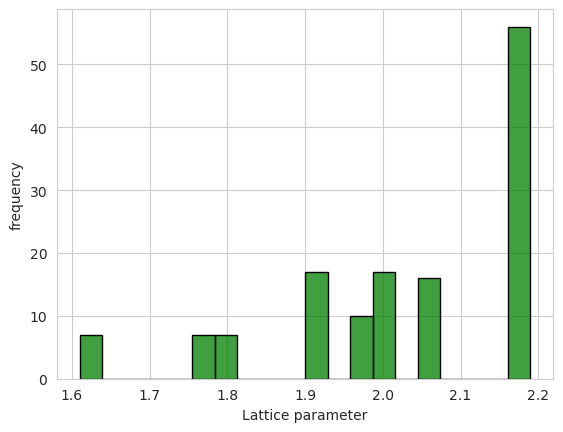

In [433]:
#Visulising data
# 1. Histogram
import seaborn as sns
sns.set_style('whitegrid')
sns.histplot(data['ez'], bins = 20, color='green',edgecolor='black')
plt.xlabel("Lattice parameter")
plt.ylabel("frequency")

plt.show()

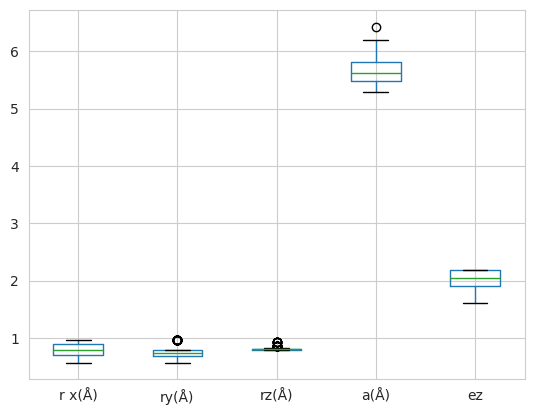

In [305]:
data.boxplot()
plt.show()

/tmp/ipykernel_4340/3275554246.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)


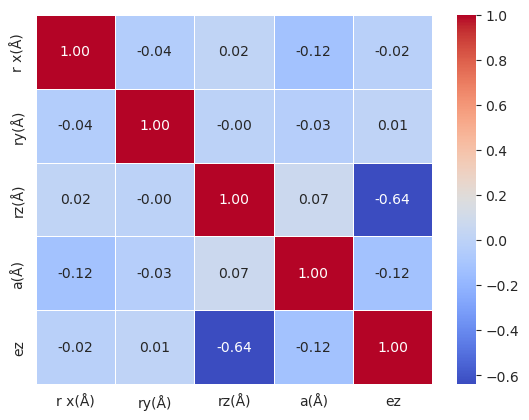

In [306]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.show()

## Feature engineering
### 1. Labeling features and target

In [434]:
data

,Compound(xyz),r x(Å),ry(Å),rz(Å),a(Å),ez
0,CoMnP,0.90,0.96,0.80,5.34,2.19
1,CoFeP,0.90,0.78,0.80,5.35,2.19
2,CoMnSi,0.90,0.96,0.85,5.36,1.90
3,CoVP,0.90,0.72,0.80,5.36,2.19
4,CoCrSi,0.90,0.57,0.85,5.36,1.90
...,...,...,...,...,...,...
132,FeMnSi,0.78,0.96,0.85,5.32,1.90
133,FeVP,0.78,0.72,0.80,5.31,2.19
134,FeFeP,0.78,0.78,0.80,5.31,2.19
135,MnCrP,0.96,0.57,0.80,5.30,2.19


In [348]:
features = ['r x(Å)', 'ry(Å)', 'rz(Å)', 'a(Å)',]
target = data['ez']

In [435]:
X = data[features]
y = target
print("shape of X = ",X.shape)
print("shape of y = ",y.shape)

shape of X =  (137, 4)
shape of y =  (137,)


### 2. Feature Selection
 Random forest algorith is generally used to select proper features for the provided target variables.

### 2. Feature Scalig
#### Standard Scaler()

In [350]:

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [436]:
print("shape of X_train = ",X_train.shape)
print("shape of X_test = ",X_test.shape)
#print("shape of y_train = ",y_train.shape)
#print("shape of y_test = ",X_test.shape)

shape of X_train =  (109, 4)
shape of X_test =  (28, 4)


In [437]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [439]:
sc.mean_
sc.scale_

array([0.11249689, 0.13480939, 0.03362933, 0.223222  ])

In [441]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

array([[-2.22799222, -0.4096848 , -0.66019263,  3.46838654],
       [-2.22799222,  0.25792449, -0.06547365,  1.58685158],
       [-2.22799222,  1.59314306, -0.36283314, -1.05625707],
       [-0.36127399, -0.18714837, -0.66019263, -0.74266791],
       [-1.07240475, -1.29983052, -0.66019263, -0.16028804],
       [ 1.14987885,  1.59314306,  0.52924533,  0.06370422],
       [-0.27238265, -0.18714837, -0.36283314,  0.01890577],
       [-0.27238265, -0.18714837, -0.06547365,  1.72124693],
       [-0.36127399, -0.18714837, -0.36283314, -1.54904004],
       [-0.27238265, -0.18714837, -0.66019263,  0.69088254],
       [ 0.70542213, -0.18714837, -0.66019263,  0.69088254],
       [-1.07240475,  0.25792449,  0.52924533, -0.42907875],
       [-0.27238265, -0.18714837,  1.12396431,  0.15330112],
       [-0.27238265,  1.59314306, -0.36283314,  0.06370422],
       [ 0.70542213,  0.25792449, -0.36283314, -0.69786946],
       [ 1.2387702 ,  0.25792449, -0.36283314, -0.42907875],
       [-0.36127399,  1.

In [355]:
X_train_sc = pd.DataFrame(X_train_sc, columns = ['r x(Å)', 'ry(Å)', 'rz(Å)', 'a(Å)'])
X_test_sc = pd.DataFrame(X_test_sc,columns=['r x(Å)', 'ry(Å)', 'rz(Å)', 'a(Å)'])

In [408]:
X_test_sc

,r x(Å),ry(Å),rz(Å),a(Å)
0,-2.227992,-0.409685,-0.660193,3.468387
1,-2.227992,0.257924,-0.065474,1.586852
2,-2.227992,1.593143,-0.362833,-1.056257
3,-0.361274,-0.187148,-0.660193,-0.742668
4,-1.072405,-1.299831,-0.660193,-0.160288
5,1.149879,1.593143,0.529245,0.063704
6,-0.272383,-0.187148,-0.362833,0.018906
7,-0.272383,-0.187148,-0.065474,1.721247
8,-0.361274,-0.187148,-0.362833,-1.549040
9,-0.272383,-0.187148,-0.660193,0.690883


In [357]:
X_train_sc.describe().round(2)

,r x(Å),ry(Å),rz(Å),a(Å)
count,109.00,109.00,109.00,109.00
mean,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-2.23,-1.30,-0.66,-1.64
25%,-1.07,-0.41,-0.66,-0.79
50%,-0.27,-0.19,-0.36,-0.12
75%,0.71,0.26,-0.07,0.69
max,1.24,1.59,3.21,2.39


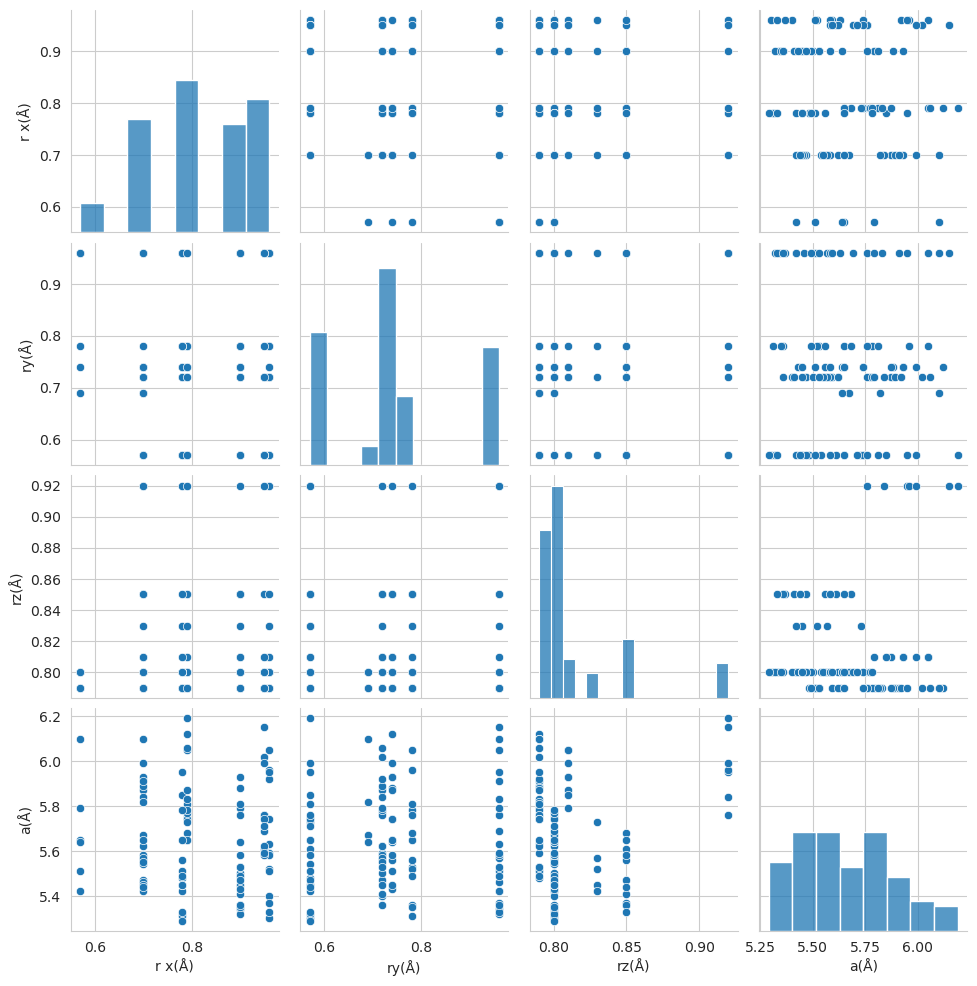

In [359]:
sns.pairplot(X_train)

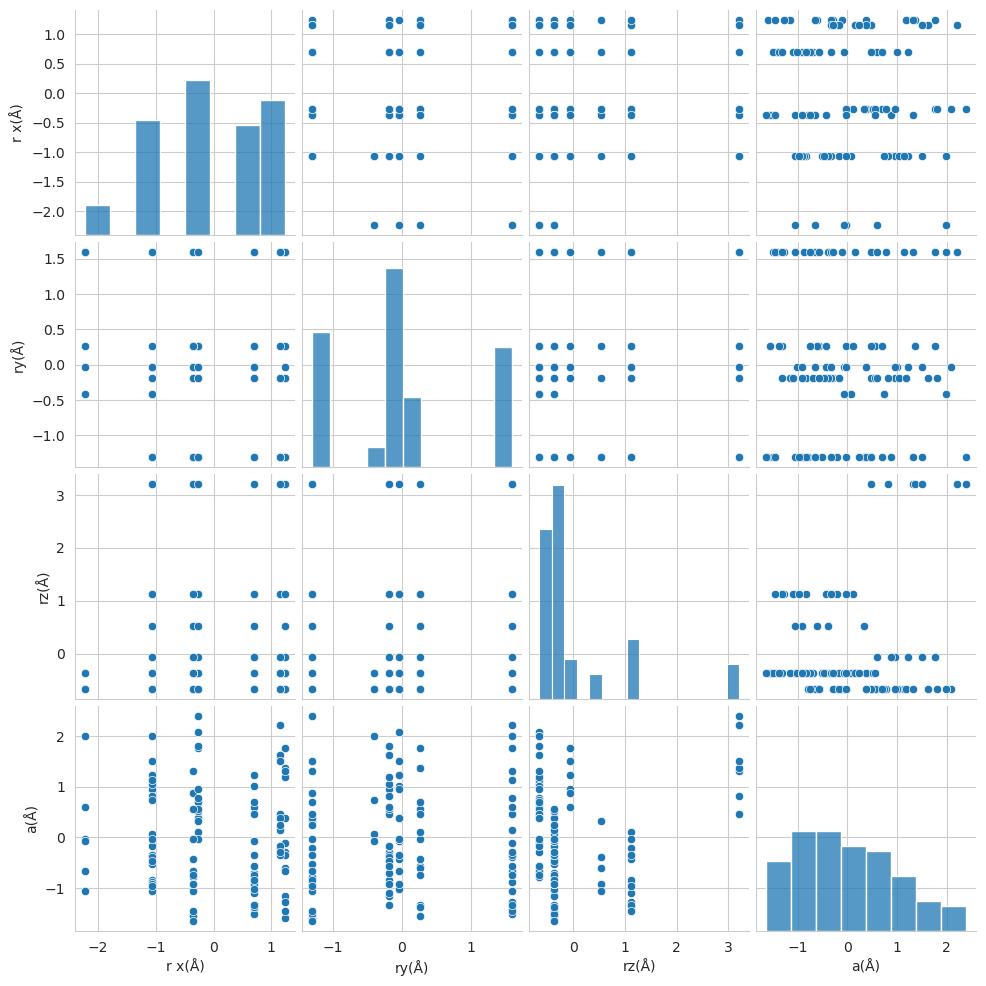

In [360]:
sns.pairplot(X_train_sc)

### Hyper-parameter optimization
#### Gridsearch CV, RandomizedSearch CV, Bayesian Optimization etc.  But, in this case we are taking default values for tutorial purpose. Generally we train test all the models by taking default values and then compare the results to get highly predictive model and then we select those models and perform optimization and then further model tuning.

### Model Tuning
## Linear regression model

In [442]:
model_lr = LinearRegression()
model_lr.fit(X_train_sc, y_train)

LinearRegression()

### Making prediction

In [445]:
y_pred = model_lr.predict(X_test_sc)
y_pred_train = model_lr.predict(X_train_sc)
y_pred_train = model_lr.predict(X_train_sc)
#print(y_pred)
print(y_pred_train)

[2.0881519  2.10464988 2.10865911 2.07032637 2.00843051 2.04937591
 2.01975544 1.68539566 1.68154998 2.10827984 2.10984705 2.05689113
 2.06130811 1.92060167 2.06007323 2.06032146 2.01451026 2.0722218
 1.98364973 2.07585914 2.11419963 2.09070657 2.12004458 2.05012743
 2.01120042 2.08243983 2.08186394 2.05686759 2.06275599 2.00415757
 2.12136333 1.91503728 2.10023161 2.09133796 2.09700702 2.05873411
 1.91226737 1.91177941 1.94102132 2.09545549 2.05971396 1.92208925
 2.0991883  1.9935482  2.07499194 2.09194566 2.07239768 2.08411534
 2.08668068 2.02649595 2.01044058 1.93366582 2.08832389 2.09528303
 2.09238524 2.07149381 2.1249933  1.95790187 2.05741104 1.95362997
 2.09046615 2.11159787 2.06606583 2.07498443 2.06729675 2.08788046
 1.97507118 2.08385889 1.90192931 2.09460773 2.09905338 2.06804079
 1.67584883 2.06955131 2.07254193 2.09774239 2.09280983 2.07845365
 2.02907745 2.05542791 2.09858558 2.10567656 2.0863966  2.06323539
 2.09764976 2.08549777 2.11060173 2.1120727  1.67763699 2.06899

In [446]:
print(y_pred_train)

[2.0881519  2.10464988 2.10865911 2.07032637 2.00843051 2.04937591
 2.01975544 1.68539566 1.68154998 2.10827984 2.10984705 2.05689113
 2.06130811 1.92060167 2.06007323 2.06032146 2.01451026 2.0722218
 1.98364973 2.07585914 2.11419963 2.09070657 2.12004458 2.05012743
 2.01120042 2.08243983 2.08186394 2.05686759 2.06275599 2.00415757
 2.12136333 1.91503728 2.10023161 2.09133796 2.09700702 2.05873411
 1.91226737 1.91177941 1.94102132 2.09545549 2.05971396 1.92208925
 2.0991883  1.9935482  2.07499194 2.09194566 2.07239768 2.08411534
 2.08668068 2.02649595 2.01044058 1.93366582 2.08832389 2.09528303
 2.09238524 2.07149381 2.1249933  1.95790187 2.05741104 1.95362997
 2.09046615 2.11159787 2.06606583 2.07498443 2.06729675 2.08788046
 1.97507118 2.08385889 1.90192931 2.09460773 2.09905338 2.06804079
 1.67584883 2.06955131 2.07254193 2.09774239 2.09280983 2.07845365
 2.02907745 2.05542791 2.09858558 2.10567656 2.0863966  2.06323539
 2.09764976 2.08549777 2.11060173 2.1120727  1.67763699 2.06899

###  Model evaluation


In [447]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [448]:
print(f" The MSE = {mse}")
print(f" The RMSE = {rmse}")
print(f" The R2 score = {r2}")
print(f" The MAE = {mae}")

 The MSE = 0.02260018174086309
 The RMSE = 0.1503335682436331
 The R2 score = 0.2500405280268915
 The MAE = 0.10966193052756987


In [449]:
data

,Compound(xyz),r x(Å),ry(Å),rz(Å),a(Å),ez
0,CoMnP,0.90,0.96,0.80,5.34,2.19
1,CoFeP,0.90,0.78,0.80,5.35,2.19
2,CoMnSi,0.90,0.96,0.85,5.36,1.90
3,CoVP,0.90,0.72,0.80,5.36,2.19
4,CoCrSi,0.90,0.57,0.85,5.36,1.90
...,...,...,...,...,...,...
132,FeMnSi,0.78,0.96,0.85,5.32,1.90
133,FeVP,0.78,0.72,0.80,5.31,2.19
134,FeFeP,0.78,0.78,0.80,5.31,2.19
135,MnCrP,0.96,0.57,0.80,5.30,2.19


In [450]:
new_features = [1.3,1.8, 2.3, 5.4]
new_ez = model_lr.predict([new_features])
print(new_ez)

[1.7209589]


In [451]:
data.describe()

,r x(Å),ry(Å),rz(Å),a(Å),ez
count,137.000000,137.000000,137.000000,137.000000,137.000000
mean,0.811387,0.751752,0.811314,5.656204,2.026423
std,0.116102,0.135136,0.031804,0.231600,0.164999
min,0.570000,0.570000,0.790000,5.290000,1.610000
25%,0.700000,0.690000,0.790000,5.480000,1.900000
50%,0.790000,0.740000,0.800000,5.620000,2.050000
75%,0.900000,0.780000,0.810000,5.810000,2.180000
max,0.960000,0.960000,0.920000,6.430000,2.190000


### You can also perform k-Fold validation to validate your result

In [419]:
from sklearn.model_selection import cross_val_score
mse_scorer = make_scorer(mean_squared_error)
mse_scores = cross_val_score(model_lr, X_train_sc, y_train, cv=5, scoring=mse_scorer)
r2_scorer = make_scorer(r2_score)
r2_scores = cross_val_score(model_lr,X_train_sc, y_train, cv =5, scoring=r2_scorer)
print("Mean-squared error :", mse_scores)
print("R2 score :", r2_scores)

Mean-squared error : [0.01480003 0.02293984 0.01806895 0.0148656  0.01235723]
R2 score : [0.45482119 0.19188285 0.23264687 0.40804216 0.4857859 ]


### Now test other regression model
    Ridge, Kernel Ridge Regressor, Lasso, DecessionTree regressor, Random forest regressor, GradienBoosting regressor, XGB regressor,Gaussian Process regressor

### Data Visualisation

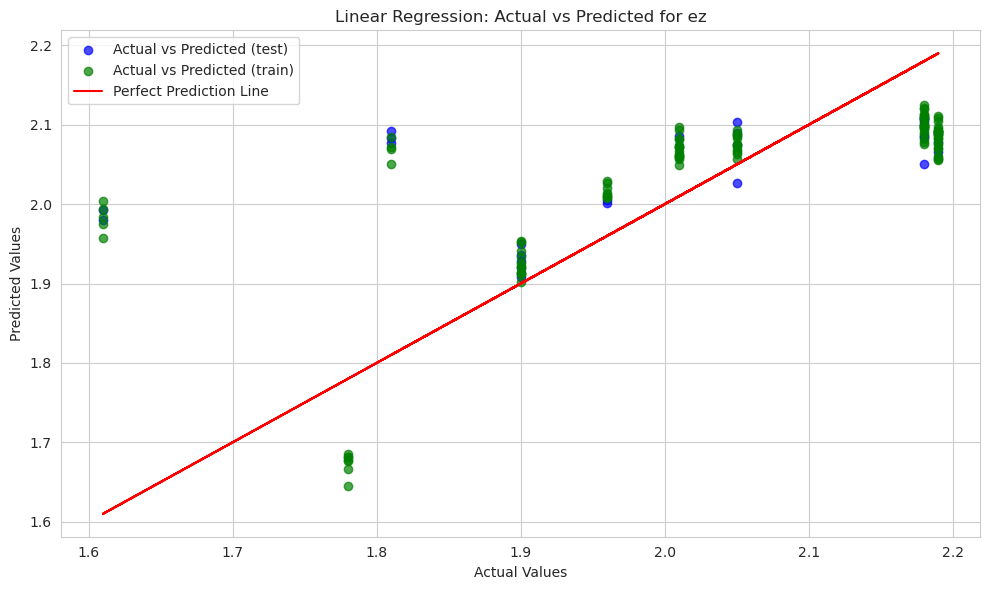

In [420]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted (test)')
plt.scatter(y_train, y_pred_train, color='green', alpha=0.7, label='Actual vs Predicted (train)')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction Line')
plt.title('Linear Regression: Actual vs Predicted for ez')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()